## data: https://www.kaggle.com/nltkdata/movie-review

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier # Our models.

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Load Data

In [2]:
df = pd.read_csv("movie_review.csv")


## Exploring the data


In [3]:
df.head()


,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [4]:
df.isna().any() # Checking for null values


fold_id    False
cv_tag     False
html_id    False
sent_id    False
text       False
tag        False
dtype: bool

In [5]:
df.fold_id.value_counts()


6    6917
4    6681
5    6615
9    6611
7    6594
3    6379
0    6323
8    6220
2    6201
1    6179
Name: fold_id, dtype: int64

In [6]:
df.cv_tag.value_counts()

cv256    166
cv501    153
cv122    145
cv638    144
cv623    143
        ... 
cv329     25
cv825     25
cv515     25
cv114     24
cv058     23
Name: cv_tag, Length: 1000, dtype: int64

## Data Visualization

<BarContainer object of 2 artists>

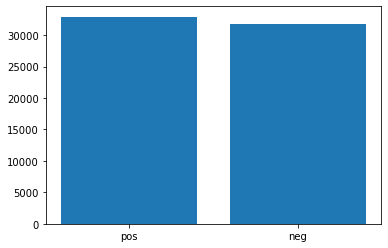

In [7]:
pos_neg_count = df.tag.value_counts()

plt.bar(df.tag.unique(), [pos_neg_count[0], pos_neg_count[1]])

## Data Preparation

In [8]:
df.dtypes

fold_id     int64
cv_tag     object
html_id     int64
sent_id     int64
text       object
tag        object
dtype: object

In [9]:
df = df.drop(["fold_id", "cv_tag", "html_id", "sent_id"], axis=1) # Dropping not necessary columns.

In [10]:
df

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos
...,...,...
64715,that lack of inspiration can be traced back to...,neg
64716,like too many of the skits on the current inca...,neg
64717,"after watching one of the "" roxbury "" skits on...",neg
64718,"bump unsuspecting women , and . . . that's all .",neg


In [11]:
POS = 1
NEG = 0

df.tag = df.tag.apply(lambda x: POS if x == "pos" else NEG)
df.tag.unique() # Converting the column to numeric column

array([1, 0], dtype=int64)

In [12]:
df

,text,tag
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1
...,...,...
64715,that lack of inspiration can be traced back to...,0
64716,like too many of the skits on the current inca...,0
64717,"after watching one of the "" roxbury "" skits on...",0
64718,"bump unsuspecting women , and . . . that's all .",0


In [13]:
X = df.text
y = df.tag

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [15]:
train_tokenizer = Tokenizer()
train_tokenizer.fit_on_texts(X_train)

In [16]:
X_train = train_tokenizer.texts_to_sequences(X_train)
X_train[:3]

[[3346,
  6,
  538,
  1188,
  2,
  2667,
  4518,
  27,
  160,
  1101,
  10853,
  2073,
  3,
  278,
  53,
  1,
  1524,
  1203],
 [18,
  68,
  4519,
  5,
  184,
  9,
  4520,
  10,
  218,
  10,
  1,
  5795,
  12,
  178,
  1136,
  3,
  23068,
  10,
  109,
  4,
  1,
  202],
 [3,
  1,
  3685,
  671,
  21,
  23069,
  3,
  1740,
  14403,
  6,
  24,
  4,
  1,
  65,
  3347,
  14404,
  4,
  1,
  171,
  1179,
  182]]

In [17]:
X_train_padded = pad_sequences(X_train) # Pad all the elements in X_train to make them all with the same shape
X_train_padded[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [18]:
test_tokenizer = Tokenizer()
test_tokenizer.fit_on_texts(X_test)

In [19]:
X_test = test_tokenizer.texts_to_sequences(X_test)
X_test[:3]

[[180, 123, 770, 4278, 43, 8438, 226, 82, 5, 805, 7, 14, 305, 2748],
 [3, 99, 54, 6, 10629, 8439, 5334, 2, 3340, 5, 1, 114],
 [18,
  6,
  2,
  115,
  27,
  33,
  10630,
  5,
  1,
  271,
  4,
  14,
  5335,
  22,
  14697,
  29,
  82,
  14698,
  14,
  1348,
  14699,
  1485]]

In [20]:
X_test_padded = pad_sequences(X_test, maxlen=X_train_padded.shape[1]) # Pad all the elements in X_train to make them all with the same shape
X_test_padded[:3]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

## Now the data is ready, and we can proceed to the machine learning part.

In [21]:
models = [
    dict(model_name="GaussianNB", model=GaussianNB()),
    dict(model_name="MultinomialNB", model=MultinomialNB()),
    dict(model_name="RandomForestClassifier", model=RandomForestClassifier()),

]

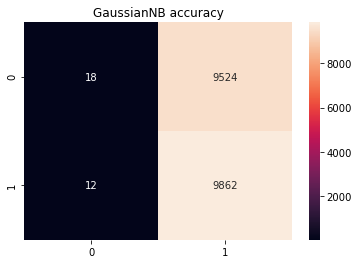

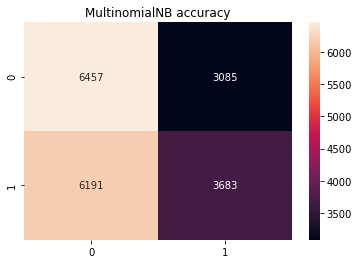

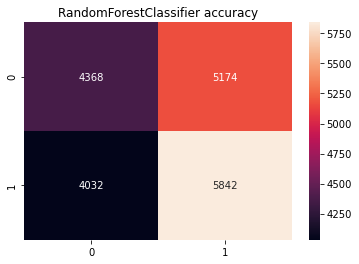

In [23]:
models_scores = []

for item in models:
    model = item["model"]
    model.fit(X_train_padded, y_train)
    y_predicted = model.predict(X_test_padded)

    models_scores.append(accuracy_score(y_test, y_predicted))

    plt.title(item["model_name"] + " accuracy")
    plt.xlabel("y_test")
    plt.ylabel("y_predicted")

    cm = confusion_matrix(y_test, y_predicted)

    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

In [24]:
models_scores

[0.5088586732591677, 0.5222496909765142, 0.5258549649773383]

In [25]:
models_scores = np.array(models_scores)
best_model_index = np.argmax(models_scores)

models[best_model_index]




{'model_name': 'RandomForestClassifier', 'model': RandomForestClassifier()}